<a href="https://colab.research.google.com/github/RajaAbitha/RajaAbitha/blob/main/CASE_STUDY02new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# Load Dataset Wholesale customers
df = pd.read_csv('/content/Wholesale customers data(1).csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

In [4]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


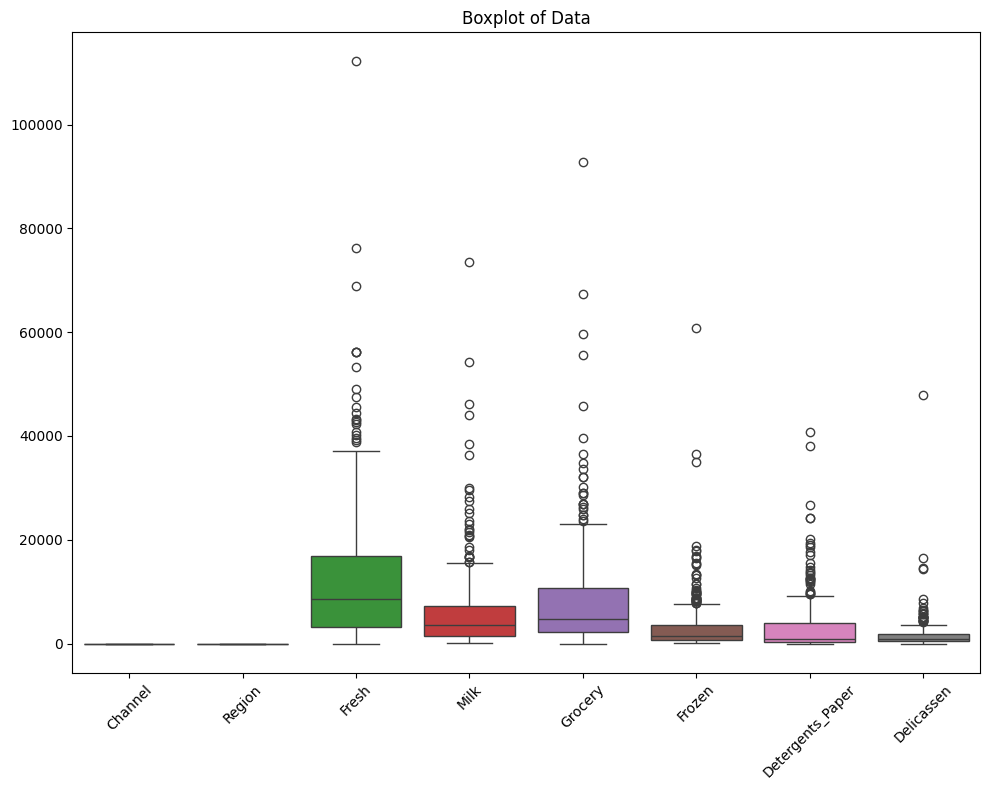

In [9]:
#  Outlier detection
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplot of Data')
plt.tight_layout()
plt.show()


In [10]:
df_clean=df.drop(['Channel','Region'],axis=1)

In [12]:
df_clean = df.copy()
columns_to_clean = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for col in columns_to_clean:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("Data shape after outlier removal:", df_clean.shape)


Data shape after outlier removal: (318, 8)


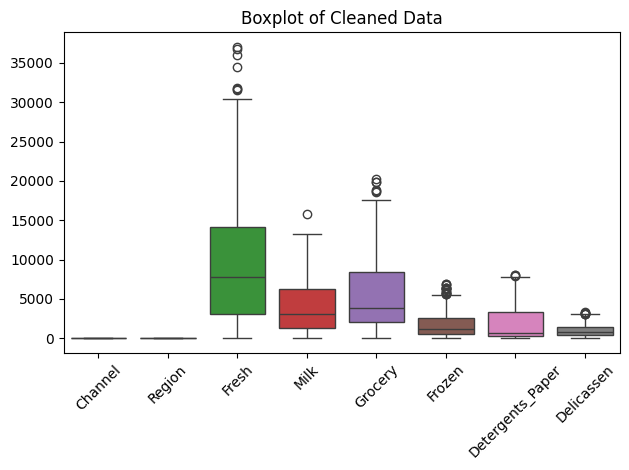

In [13]:
sns.boxplot(data=df_clean)
plt.xticks(rotation=45)
plt.title('Boxplot of Cleaned Data')
plt.tight_layout()
plt.show()

In [14]:
# Preprocessing the dataset
from sklearn.preprocessing import StandardScaler
X = df_clean.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


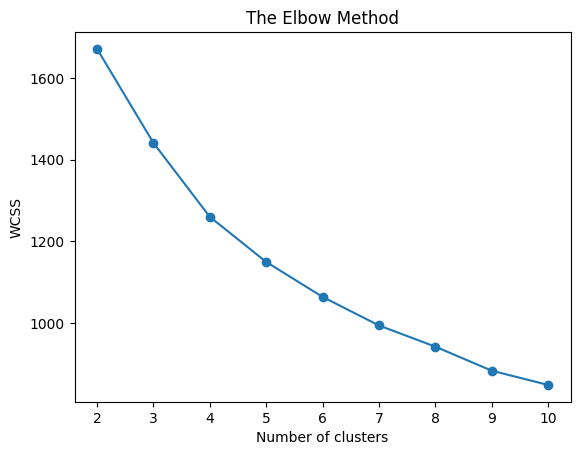

In [15]:
# K-Means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ELbow method
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

In [16]:
km=KMeans(n_clusters=2)
km.fit(X_scaled)

KMeans(n_clusters=2)

In [17]:
from sklearn.metrics import silhouette_score
clustered_label=km.predict(X_scaled)
df_clean['KMeans_Cluster']=clustered_label
df_clean.head()

kmeans_score = silhouette_score(X_scaled,clustered_label)
print(f"KMeans Silhouette Score: {kmeans_score:.3f}")


KMeans Silhouette Score: 0.356


In [18]:
clustered_label

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,

In [19]:
pd.Series(clustered_label).value_counts()


,count
0,226
1,92


In [20]:
fresh_col_index = df_clean.columns.get_loc('Fresh')
milk_col_index = df_clean.columns.get_loc('Milk')
grocery_col_index = df_clean.columns.get_loc('Grocery')
frozen_col_index= df_clean.columns.get_loc('Frozen')
deassen_col_index = df_clean.columns.get_loc('Delicassen')
detergents_col_index = df_clean.columns.get_loc('Detergents_Paper')

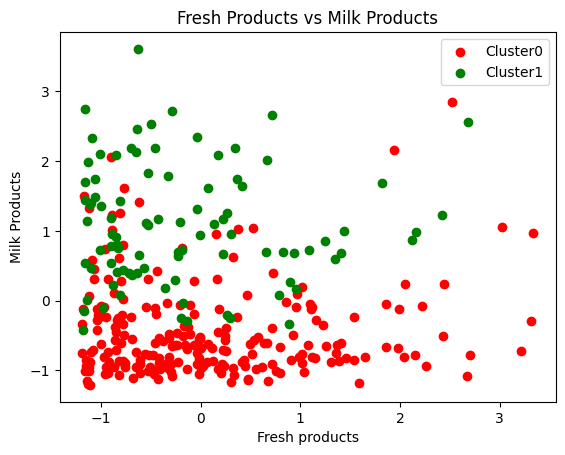

In [21]:
colors=['r','g','b','y','c']

colors = ['r','g','b','y','c']
for i in range(max(clustered_label)+1):
  cluster_data = X_scaled[clustered_label==i]
  plt.scatter(cluster_data[:,fresh_col_index],
              cluster_data[:,milk_col_index],
              c = colors[i],
              label = f'Cluster{i}')
plt.legend()
plt.xlabel('Fresh products')
plt.ylabel('Milk Products')
plt.title('Fresh Products vs Milk Products')
plt.show()

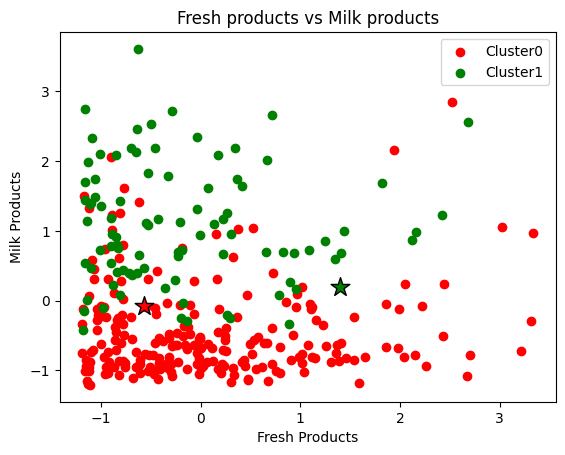

In [22]:
colors = ['r','g','b','y','c']
for i in range(max(clustered_label)+1):
  cluster_data = X_scaled[clustered_label==i]
  plt.scatter(cluster_data[:,fresh_col_index],
              cluster_data[:,milk_col_index],
              c = colors[i],
              label = f'Cluster{i}')
  plt.scatter(km.cluster_centers_[i,0],
              km.cluster_centers_[i,1],
              c = colors[i],
              marker = '*',s = 200,
              edgecolor='black')
plt.legend()
plt.xlabel('Fresh Products')
plt.ylabel('Milk Products')
plt.title('Fresh products vs Milk products')
plt.show()

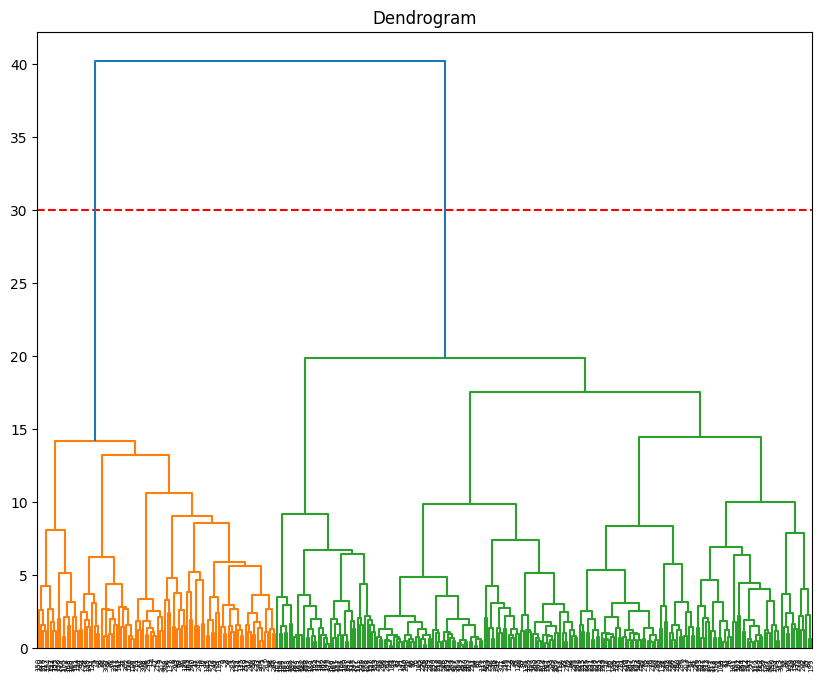

In [23]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
import seaborn as sns

linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 8))
plt.axhline(y=30, color='r', linestyle='--')
dendrogram(linked)
plt.title("Dendrogram")
plt.show()



In [24]:
# Agglomerative clustering
hc = AgglomerativeClustering(n_clusters=2)
hc.fit(X_scaled)
df_clean['Agglomerative_Cluster']=hc.labels_


In [25]:
clusters=fcluster(linked, 30, criterion='distance')
clusters

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1,

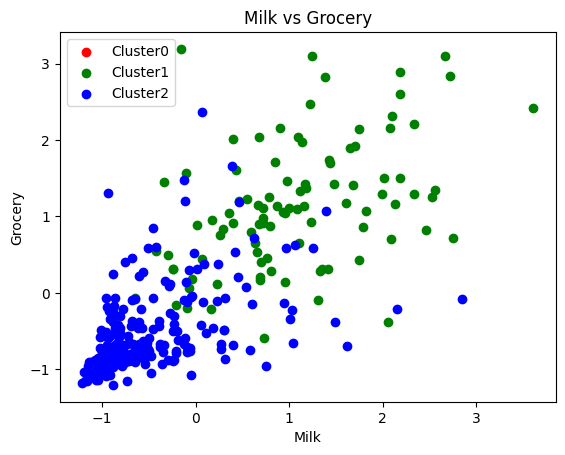

In [26]:
colors=['g','b','r']
for i in range(max(clusters)+1):
  cluster_data = X_scaled[clusters==i]
  plt.scatter(cluster_data[:,milk_col_index],
              cluster_data[:,grocery_col_index],
              c = colors[i-1],
              label = f'Cluster{i}')
plt.legend()
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Milk vs Grocery')
plt.show()


In [27]:
# DBSCAN clustering

from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=1.8,min_samples=3)
dbscan.fit(X_scaled)
df_clean['DBSCAN_Cluster']=dbscan.labels_
df_clean.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Cluster,Agglomerative_Cluster,DBSCAN_Cluster
0,2,3,12669,9656,7561,214,2674,1338,1,1,0
1,2,3,7057,9810,9568,1762,3293,1776,1,1,0
3,1,3,13265,1196,4221,6404,507,1788,0,0,1
5,2,3,9413,8259,5126,666,1795,1451,1,1,0
6,2,3,12126,3199,6975,480,3140,545,1,1,0


In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

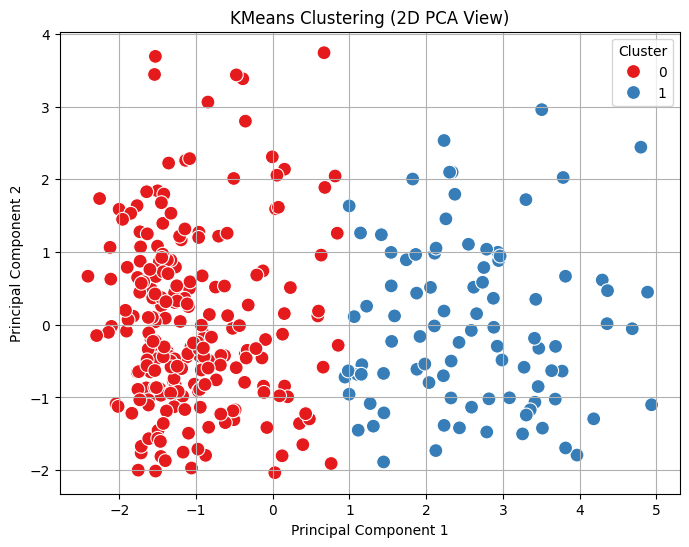

In [29]:
df_clean['PCA1'] = X_pca[:, 0]
df_clean['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df_clean, palette='Set1', s=100)
plt.title('KMeans Clustering (2D PCA View)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

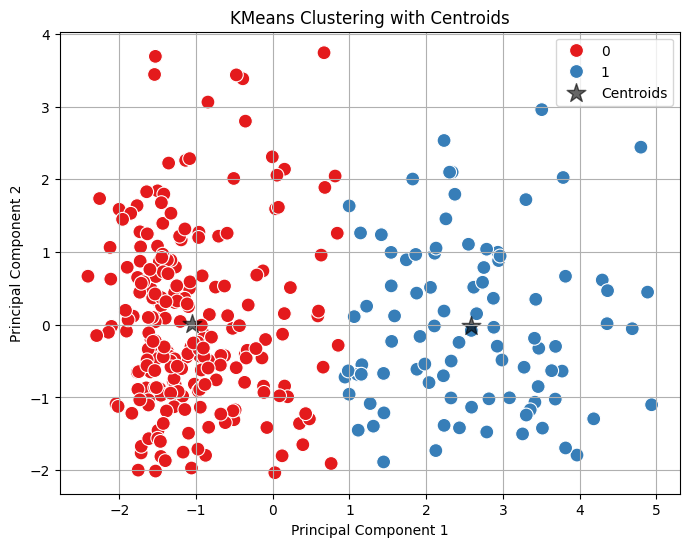

In [30]:
# Transform cluster centers to PCA space
centers = pca.transform(km.cluster_centers_)

# Plot again with cluster centers
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df_clean, palette='Set1', s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6, marker='*', label='Centroids')
plt.title('KMeans Clustering with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
#Kmeans
silhouette_avg=silhouette_score(X_scaled,clustered_label)
print(f'The silhouette score for Kmeans is {silhouette_avg}')

The silhouette score for Kmeans is 0.3564336128843562


In [34]:
silhouette_avg=silhouette_score(X_scaled,clusters)
print(f'The silhouette score for HC is {silhouette_avg}')

The silhouette score for HC is 0.3340201086974759


In [36]:
df_clean['KMeans'] = km.labels_

In [37]:
# Average spending per cluster
cluster_profile = df_clean.groupby('KMeans').mean()
print(cluster_profile)

         Channel    Region         Fresh         Milk       Grocery  \
KMeans                                                                
0       1.017699  2.500000  10273.154867  2560.579646   3198.234513   
1       1.891304  2.706522   8354.826087  7498.554348  11374.456522   

             Frozen  Detergents_Paper   Delicassen  KMeans_Cluster  \
KMeans                                                               
0       2031.544248        669.876106   861.725664             0.0   
1       1230.010870       4716.521739  1285.032609             1.0   

        Agglomerative_Cluster  DBSCAN_Cluster      PCA1      PCA2  
KMeans                                                             
0                    0.048673        0.880531 -1.051773  0.006126  
1                    0.945652       -0.054348  2.583703 -0.015047  
